In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import pandas as pd 
import sklearn 
import numpy as np 
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import neighbors, linear_model
from sklearn.model_selection import GridSearchCV

/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kamesh-k/anaconda3/envs/RDKit/lib/pyt

In [129]:
data_625 = pd.read_csv('Data625.csv')
data_825 = pd.read_csv('Data825.csv')
data_b3 = pd.read_csv('DataB3.csv')
data_c2000 = pd.read_csv('DataC2000.csv')

train_alloys = [data_625,data_825,data_c2000]
train_data = pd.concat(train_alloys)
test_data = data_b3

train_data['ni'] = train_data['ni'].astype(float)
train_data['mo'] = train_data['mo'].astype(float)
train_data['w'] = train_data['w'].astype(float)
train_data['v'] = train_data['v'].astype(float)
train_data['acid con'] = train_data['acid con'].astype(float)
train_data['Corr'] = train_data['Corr'].astype(float)

test_data['ni'] = test_data['ni'].astype(float)
test_data['mo'] = test_data['mo'].astype(float)
test_data['w'] = test_data['w'].astype(float)
test_data['v'] = test_data['v'].astype(float)
test_data['acid con'] = test_data['acid con'].astype(float)
test_data['Corr'] = test_data['Corr'].astype(float)

train_data['Corr'] = train_data['Corr'].astype('category')
test_data['Corr'] = test_data['Corr'].astype('category')

train_y = np.array(train_data[['Corr']]).ravel()
train_x = train_data.drop(columns={'Corr'})

test_y = np.array(test_data[['Corr']]).ravel()
test_x = test_data.drop(columns={'Corr'})

In [112]:
# scaler_train = MinMaxScaler()
# scaled_train = scaler_train.fit_transform(train_x)
# scaled_test = scaler_train.transform(test_x)

# train_x = scaled_train
# test_x = scaled_test

In [95]:
def confusion_data(model,train_X,test_X):
    print("Confustion matrix of Train Data")
    cm_train = confusion_matrix(train_Y,model.predict(train_X))
    print(cm_train)
    print("Total number of points = {}".format(sum(sum(cm_train))))
    print("Confustion matrix of Test Data")
    cm_test = confusion_matrix(test_Y,model.predict(test_X))
    print(cm_test)
    print("Total number of points = {}".format(sum(sum(cm_test))))
def classification_results(y_true, y_pred):
    print(classification_report(y_true,y_pred))
    print(confusion_matrix(y_true,y_pred))
    print('MSE of the algorithm - {}'.format(mean_squared_error(y_true,y_pred)))
    print('RMSE of the algorithm - {}'.format(mean_squared_error(y_true,y_pred)))
    print('MAE of the algorithm - {}'.format(mean_absolute_error(y_true,y_pred)))
    print('R2 Score of the algorithm - {}'.format(r2_score(y_true,y_pred)))
def StratKFold(n,model,x,y):
    StratKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
    lst_accu_stratified = [] 
    for train_index, test_index in StratKFold.split(x, y): 
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index] 
        y_train_fold, y_test_fold = y[train_index], y[test_index] 
        model.fit(x_train_fold, y_train_fold) 
        lst_accu_stratified.append(r2_score(np.argmax(model.predict(x_test_fold),axis=1),y_test_fold))
#         lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    print('List of possible accuracy:', lst_accu_stratified) 
    print('\nMaximum Accuracy:', 
          max(lst_accu_stratified)*100, '%') 
    print('\nMinimum Accuracy:', 
          min(lst_accu_stratified)*100, '%') 
    print('\nOverall Accuracy:', 
          np.mean(lst_accu_stratified)*100, '%') 
    print('\nStandard Deviation is:', np.std(lst_accu_stratified)) 
    return lst_accu_stratified

In [121]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(train_x, train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [122]:
# Train Results 
classification_results(train_y,grid.predict(train_x))
#Test Results 
classification_results(test_y,grid.predict(test_x))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       258
         1.0       0.90      0.90      0.90        60
         2.0       0.98      0.96      0.97       199
         3.0       0.98      0.99      0.99       220

    accuracy                           0.97       737
   macro avg       0.96      0.96      0.96       737
weighted avg       0.97      0.97      0.97       737

[[254   3   1   0]
 [  5  54   1   0]
 [  1   3 191   4]
 [  0   0   2 218]]
MSE of the algorithm - 0.035278154681139755
RMSE of the algorithm - 0.035278154681139755
MAE of the algorithm - 0.029850746268656716
R2 Score of the algorithm - 0.9771937425018566
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89       160
         1.0       0.00      0.00      0.00        15
         2.0       0.00      0.00      0.00         0
         3.0       1.00      0.96      0.98        72

    accuracy                        

/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
def grid_generator_svm(data,scaler,model):
    corr=np.array(data[['Corr']]).ravel()
#     scaled_data = scaler.transform(data)
    predicted_corr = model.predict(data.drop(columns={'Corr'}))
    mark = predicted_corr == corr
    mark = 1*mark
    sns.scatterplot(data['acid con'],data['temp'],hue=predicted_corr,palette='deep',style=mark)
#     ,palette=['green','orange','blue','red']
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

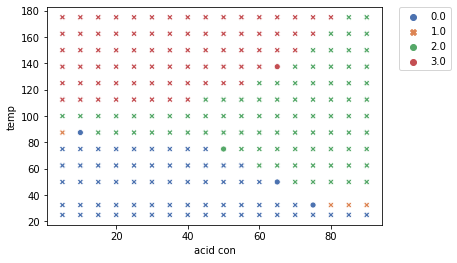

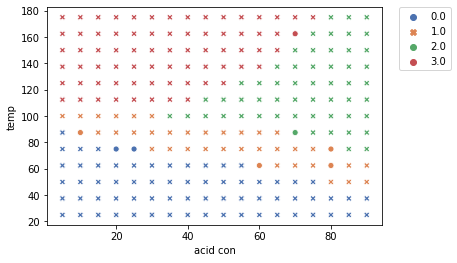

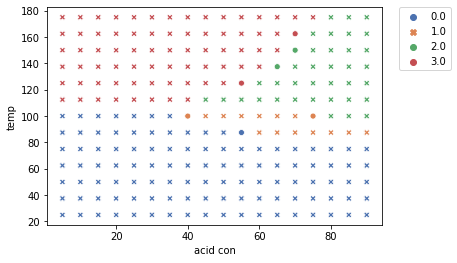

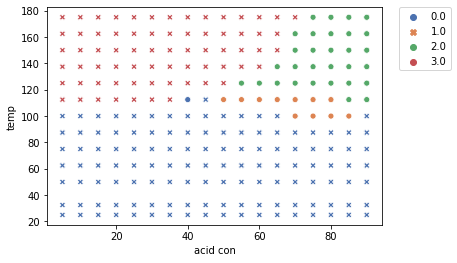

In [162]:
grid_generator_svm(data_625,scaler_train,grid)
grid_generator_svm(data_825,scaler_train,grid)
grid_generator_svm(data_c2000,scaler_train,grid)
grid_generator_svm(data_b3,scaler_train,grid)

## Neural Networks 

In [34]:
classifier = Sequential()

classifier.add(Dense(16,input_dim=16, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(8,activation='relu'))
classifier.add(Dense(4,activation='softmax'))
classifier.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [35]:
classifier.fit(train_x, train_y, epochs=150, batch_size=32, verbose=0)

In [66]:
# Train Results 
classification_results(train_y,np.argmax(classifier.predict(train_x),axis=1))
#Test Results 
classification_results(test_y,np.argmax(classifier.predict(test_x),axis=1))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       258
         1.0       0.98      0.92      0.95        60
         2.0       0.96      0.99      0.97       199
         3.0       1.00      0.96      0.98       220

    accuracy                           0.98       737
   macro avg       0.98      0.97      0.97       737
weighted avg       0.98      0.98      0.98       737

[[258   0   0   0]
 [  5  55   0   0]
 [  0   1 197   1]
 [  0   0   9 211]]
MSE of the algorithm - 0.021709633649932156
RMSE of the algorithm - 0.021709633649932156
MAE of the algorithm - 0.021709633649932156
R2 Score of the algorithm - 0.9859653800011425
              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84       160
         1.0       0.00      0.00      0.00        15
         2.0       0.00      0.00      0.00         0
         3.0       1.00      0.78      0.88        72

    accuracy                        

/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
def grid_generator_nn(data,scaler,model):
    corr=np.array(data[['Corr']]).ravel()
#     scaled_data = scaler.transform(data)
    predicted_corr = np.argmax(model.predict(data.drop(columns={'Corr'})),axis=1)
    mark = predicted_corr == corr
    mark = 1*mark
    sns.scatterplot(data['acid con'],data['temp'],hue=predicted_corr,palette='deep',style=mark)
#     ,palette=['green','orange','blue','red']
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

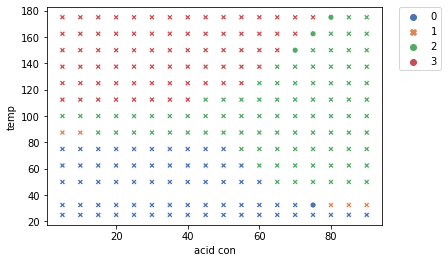

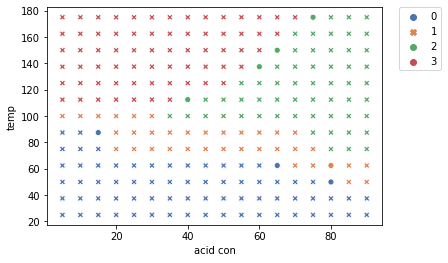

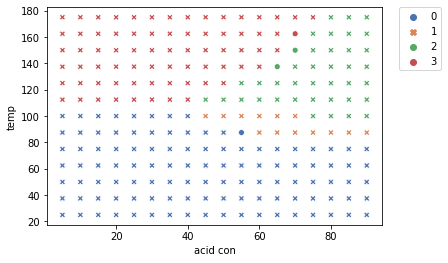

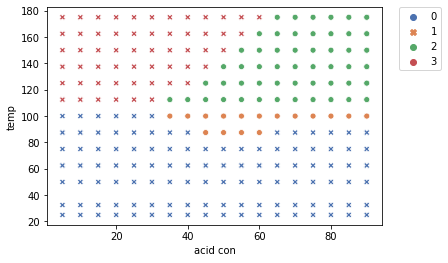

In [165]:
grid_generator_nn(data_625,scaler_train,classifier)
grid_generator_nn(data_825,scaler_train,classifier)
grid_generator_nn(data_c2000,scaler_train,classifier)
grid_generator_nn(data_b3,scaler_train,classifier)

## XGBoost

In [188]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1,
              n_estimators=100, n_jobs=4,
              objective='multi:softprob', random_state=0, scale_pos_weight=None, subsample=1,
              tree_method='exact')
model_xgb.fit(train_x,train_y)

XGBClassifier(learning_rate=0.300000012, max_depth=6, n_jobs=4,
              objective='multi:softprob', scale_pos_weight=None,
              tree_method='exact')

In [189]:
# Train Results 
classification_results(train_y,model_xgb.predict(train_x))
#Test Results 
classification_results(test_y,model_xgb.predict(test_x))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00       199
           3       1.00      1.00      1.00       220

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737

[[258   0   0   0]
 [  0  60   0   0]
 [  0   0 199   0]
 [  0   0   0 220]]
MSE of the algorithm - 0.0
RMSE of the algorithm - 0.0
MAE of the algorithm - 0.0
R2 Score of the algorithm - 1.0
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       160
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         0
           3       0.94      1.00      0.97        72

    accuracy                           0.72       247
   macro avg       0.48      0.42      0.44     

/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kamesh-k/anaconda3/envs/RDKit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


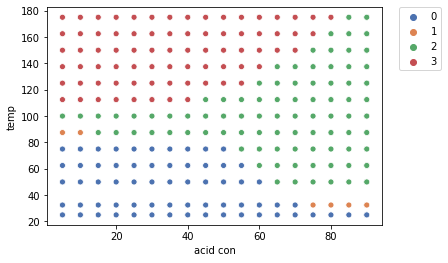

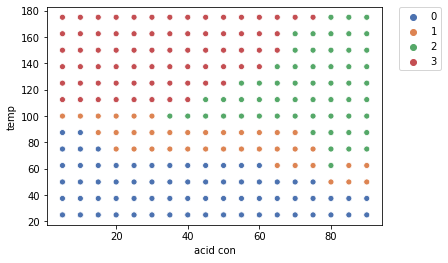

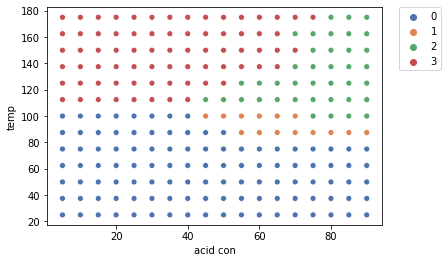

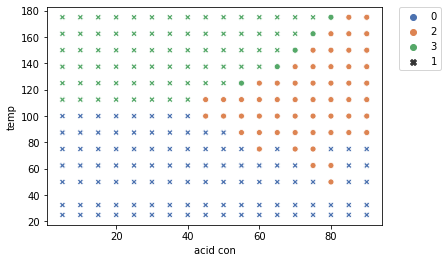

In [191]:
grid_generator_svm(data_625,scaler_train,model_xgb)
grid_generator_svm(data_825,scaler_train,model_xgb)
grid_generator_svm(data_c2000,scaler_train,model_xgb)
grid_generator_svm(data_b3,scaler_train,model_xgb)

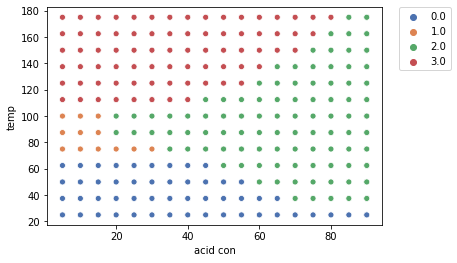

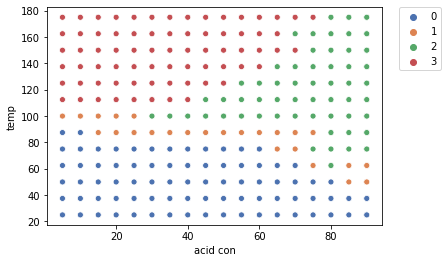

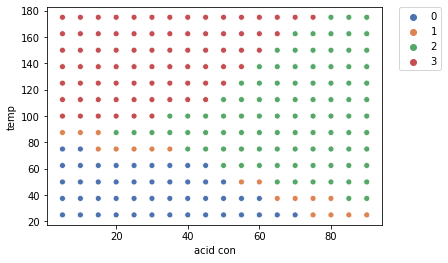

In [201]:
data_718 = pd.read_csv("Data718.csv")
data_718['ni'] = data_718['ni'].astype(float)
data_718['mo'] = data_718['mo'].astype(float)
data_718['w'] = data_718['w'].astype(float)
data_718['v'] = data_718['v'].astype(float)
data_718['acid con'] = data_718['acid con'].astype(float)

corr_svm = grid.predict(data_718.drop(columns={'Corr'}))
corr_xgb = model_xgb.predict(data_718.drop(columns={'Corr'}))
corr_ann = np.argmax(classifier.predict(data_718.drop(columns={'Corr'})),axis=1)
sns.scatterplot(data_718['acid con'],data_718['temp'],hue=corr_svm,palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
sns.scatterplot(data_718['acid con'],data_718['temp'],hue=corr_xgb,palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
sns.scatterplot(data_718['acid con'],data_718['temp'],hue=corr_ann,palette='deep')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
